<a href="https://colab.research.google.com/github/Chalitha99/Research-ML-Model/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("csv_pre_processed.csv")

# Summary statistics for numerical variables
print(df.describe())

# Count of breakdowns per address
print(df['NarrowedDownVillages'].value_counts())

# Breakdown causes frequency
print(df['Failure Cause'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns






           Duration   Temperature      Humidity     WindSpeed  Precipitation  \
count  15750.000000  15718.000000  15718.000000  15718.000000   15718.000000   
mean     764.101778     24.070707     78.515140      5.947643       0.385300   
std     1084.246640      3.320194     13.624567      4.339906       2.697029   
min        0.000000    -10.000000      6.600000      0.000000       0.000000   
25%      144.250000     22.000000     69.972500      3.200000       0.000000   
50%      331.000000     24.000000     79.600000      5.400000       0.000000   
75%     1155.750000     26.200000     89.080000      7.600000       0.000000   
max    27236.000000     43.000000    100.000000     83.500000     104.100000   

          Elevation        Target  Received Hour  
count  15718.000000  15750.000000   15750.000000  
mean     724.653128      0.202032      13.151238  
std      206.494157      0.401529       4.373839  
min        0.000000      0.000000       0.000000  
25%      659.929688     

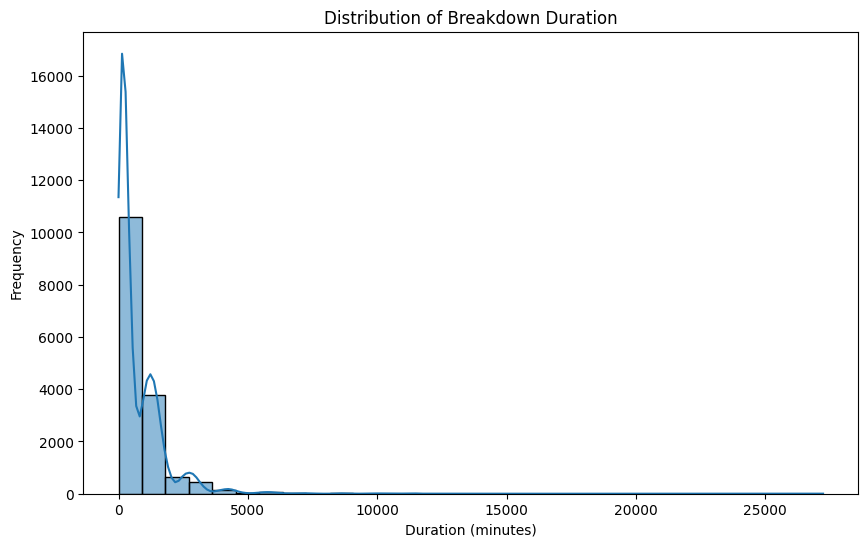

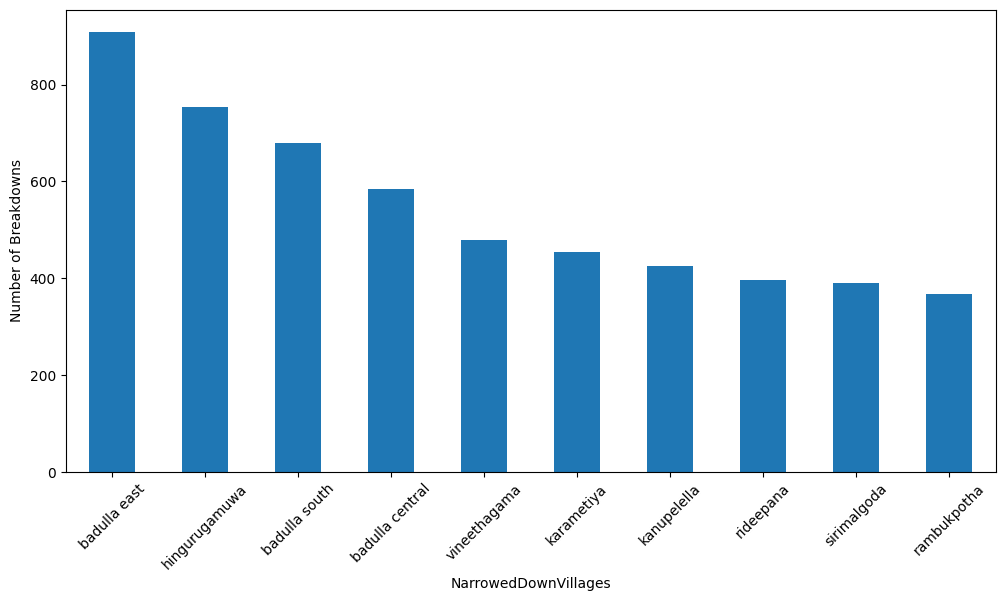

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title("Distribution of Breakdown Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()



plt.figure(figsize=(12, 6))
df['NarrowedDownVillages'].value_counts().head(10).plot(kind='bar')  # Show top 10 locations
plt.title("")
plt.xlabel("NarrowedDownVillages")
plt.ylabel("Number of Breakdowns")
plt.xticks(rotation=45)
plt.show()



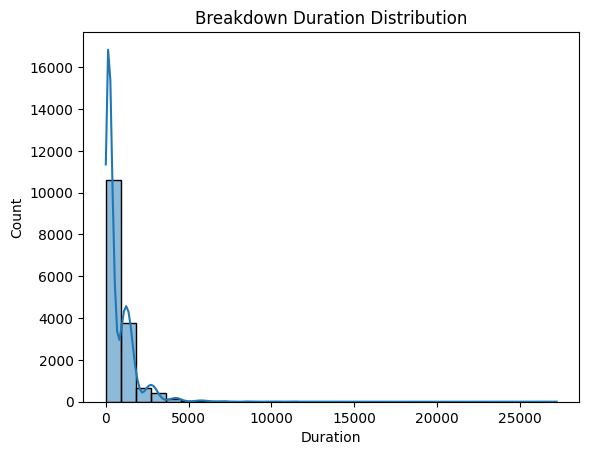

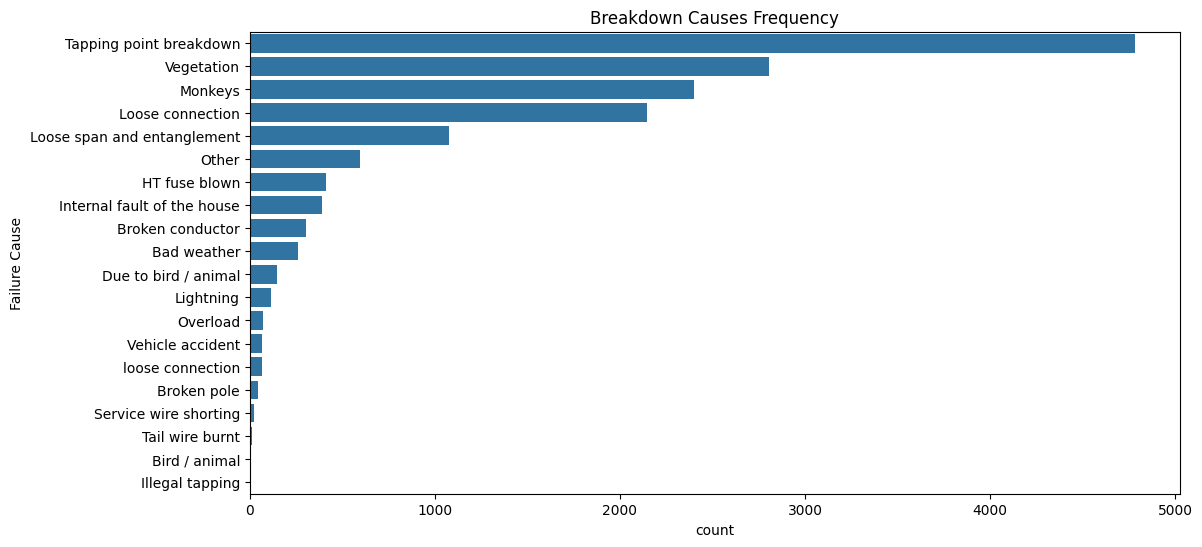

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot breakdown duration distribution
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title("Breakdown Duration Distribution")
plt.show()

# Breakdown frequency by cause
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Failure Cause'], order=df['Failure Cause'].value_counts().index)
plt.title("Breakdown Causes Frequency")
plt.show()


## **Correlation Analysis**

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("csv_pre_processed.csv")

# Selecting numerical features for correlation analysis
numerical_features = ['Temperature', 'Humidity', 'WindSpeed', 'Elevation', 'Duration']

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display correlation matrix
print(correlation_matrix)


             Temperature  Humidity  WindSpeed  Elevation  Duration
Temperature     1.000000 -0.748469   0.044607  -0.119103 -0.016072
Humidity       -0.748469  1.000000  -0.186280   0.034655  0.068441
WindSpeed       0.044607 -0.186280   1.000000  -0.034114 -0.019550
Elevation      -0.119103  0.034655  -0.034114   1.000000 -0.004616
Duration       -0.016072  0.068441  -0.019550  -0.004616  1.000000


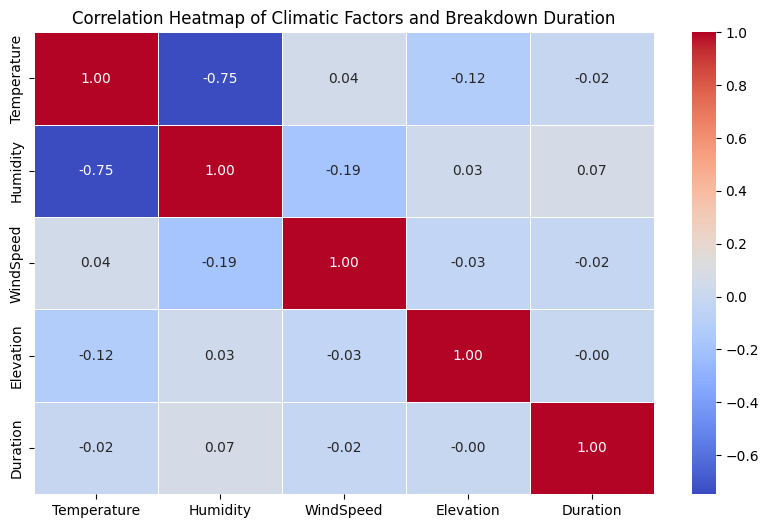

Highly correlated features (absolute correlation > 0.5):
             Temperature  Humidity  WindSpeed  Elevation  Duration
Temperature     1.000000 -0.748469        NaN        NaN       NaN
Humidity       -0.748469  1.000000        NaN        NaN       NaN
WindSpeed            NaN       NaN        1.0        NaN       NaN
Elevation            NaN       NaN        NaN        1.0       NaN
Duration             NaN       NaN        NaN        NaN       1.0


In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climatic Factors and Breakdown Duration")
plt.show()

threshold = 0.5  # Adjust as needed
high_correlation = correlation_matrix[abs(correlation_matrix) > threshold]

print("Highly correlated features (absolute correlation > 0.5):")
print(high_correlation)



# Time series Analysis

        Received Time
0 2024-11-27 19:30:00
1 2024-11-27 17:31:00
2 2024-11-27 15:53:00
3 2024-11-27 12:59:00
4 2024-11-27 12:52:00
        Received Time        Date  Hour    Weekday     Month
0 2024-11-27 19:30:00  2024-11-27    19  Wednesday  November
1 2024-11-27 17:31:00  2024-11-27    17  Wednesday  November
2 2024-11-27 15:53:00  2024-11-27    15  Wednesday  November
3 2024-11-27 12:59:00  2024-11-27    12  Wednesday  November
4 2024-11-27 12:52:00  2024-11-27    12  Wednesday  November


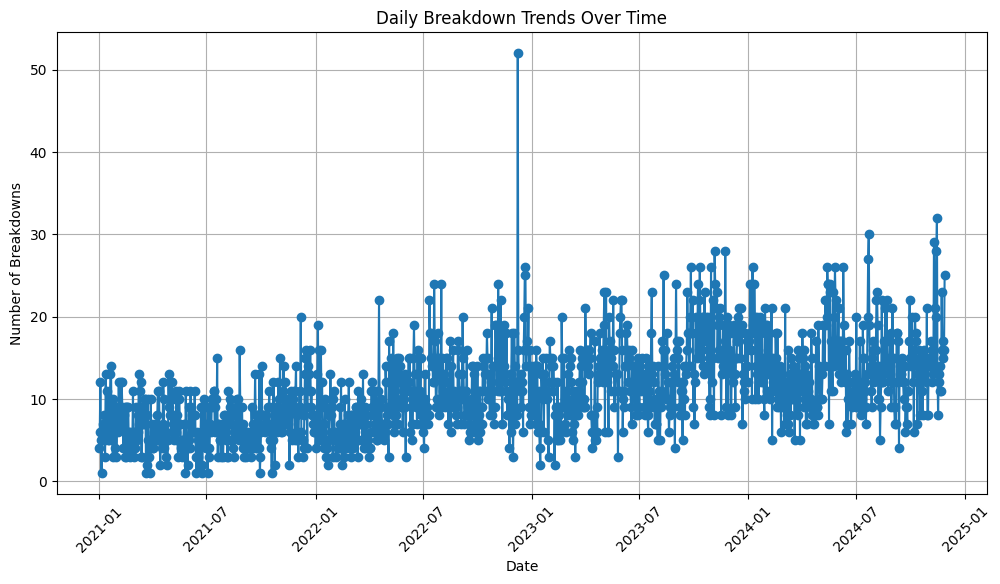

<ipython-input-25-130bab278d18>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Hour'], palette="viridis")


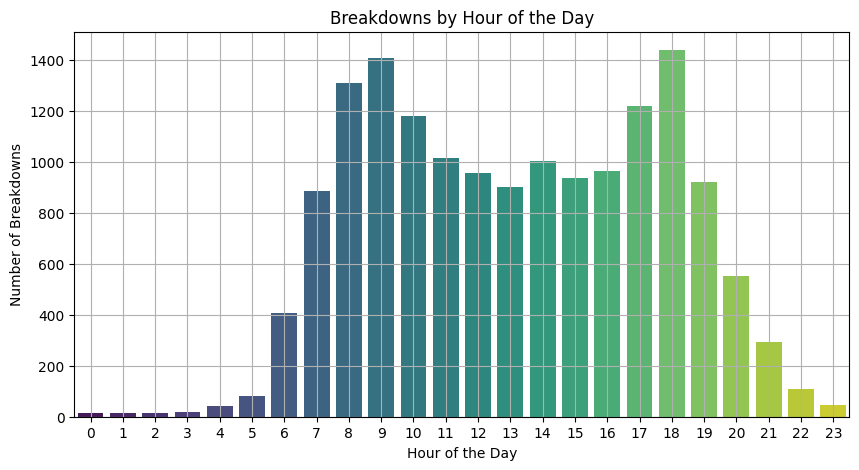

<ipython-input-25-130bab278d18>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


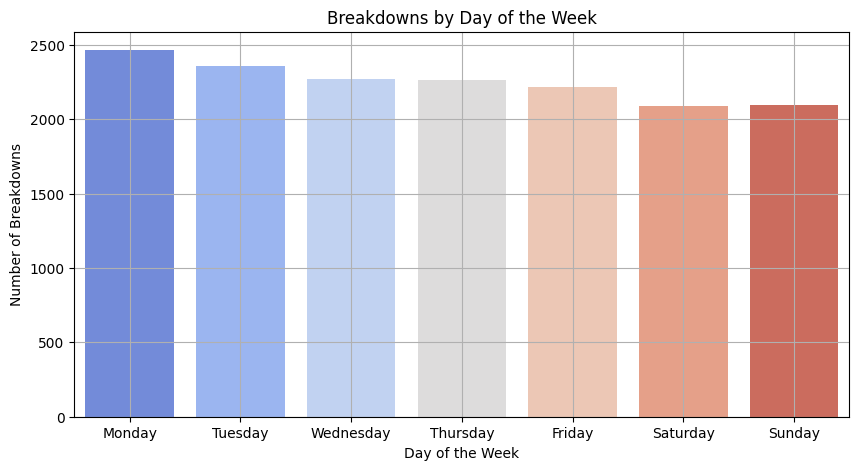

<ipython-input-25-130bab278d18>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Month'], order=['January', 'February', 'March', 'April', 'May', 'June',


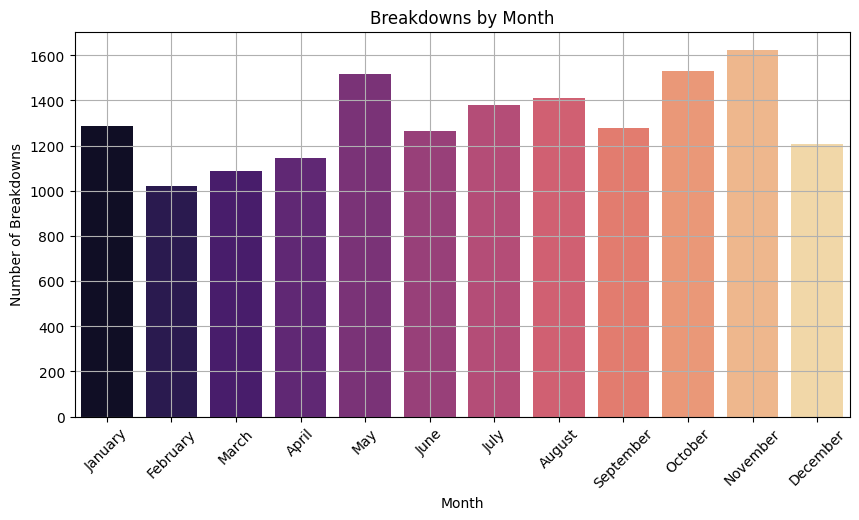

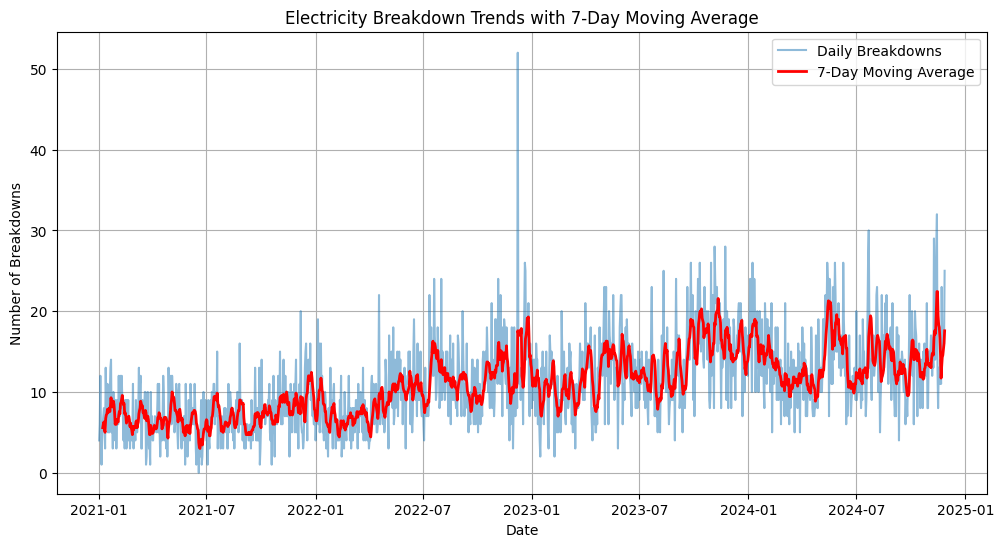

In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv("csv_pre_processed.csv")

# Convert 'Received Time' to datetime format (auto-detecting format)
df['Received Time'] = pd.to_datetime(df['Received Time'], errors='coerce')

# Display the first few rows to check if conversion is successful
print(df[['Received Time']].head())

# Extract date components
df['Date'] = df['Received Time'].dt.date  # Only the date (YYYY-MM-DD)
df['Hour'] = df['Received Time'].dt.hour  # Hour of the day (0-23)
df['Weekday'] = df['Received Time'].dt.day_name()  # Day of the week
df['Month'] = df['Received Time'].dt.month_name()  # Month name

# Display the first few rows
print(df[['Received Time', 'Date', 'Hour', 'Weekday', 'Month']].head())


import matplotlib.pyplot as plt

# Group by Date to count the number of breakdowns per day
daily_breakdowns = df.groupby('Date').size()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns, marker='o', linestyle='-')
plt.title("Daily Breakdown Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Breakdowns")
plt.xticks(rotation=45)
plt.grid()
plt.show()


import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df['Hour'], palette="viridis")
plt.title("Breakdowns by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Breakdowns")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x=df['Weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Breakdowns by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Breakdowns")
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x=df['Month'], order=['January', 'February', 'March', 'April', 'May', 'June',
                                    'July', 'August', 'September', 'October', 'November', 'December'],
              palette="magma")
plt.title("Breakdowns by Month")
plt.xlabel("Month")
plt.ylabel("Number of Breakdowns")
plt.xticks(rotation=45)
plt.grid()
plt.show()


df['Received Time'] = pd.to_datetime(df['Received Time'])  # Ensure datetime format
df.set_index('Received Time', inplace=True)  # Set as index for time series analysis

# Resample daily breakdowns
daily_counts = df.resample('D').size()

# Compute 7-day moving average
rolling_avg = daily_counts.rolling(window=7).mean()

# Plot time series with moving average
plt.figure(figsize=(12, 6))
plt.plot(daily_counts, label="Daily Breakdowns", alpha=0.5)
plt.plot(rolling_avg, label="7-Day Moving Average", color='red', linewidth=2)
plt.title("Electricity Breakdown Trends with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Breakdowns")
plt.legend()
plt.grid()
plt.show()
